In [1]:
L1 = [9,10,11,12,14,15,18,19,34,35,36,38,39,70,71,72,73,74,75,76,77,78,79,80,81,82,84,85,86,87,96,97,102,103,118,119,122,123,126,127,128,129,130,131,132,133,134,135,136,137,138,139,144]
L2 = [0,1,9,10,44,45,54,55,64,65,70,71,72,73,74,75,76,77,78,79,80,81,84,85,86,87,88,89,92,93,94,95,96,97,98,99,118,119,134,135,144]
L3 = [0,2,6,12,13,15,17,19,22,23,71,72,75,76,96,97,98,99,102,103,110,111,112,113,116,117,118,119,132,133,134,135,137,138,139,142,143,144]

In [3]:
U1 = list(set(L1) | set(L2)) 

In [7]:
U2 = list(set(U1) | set(L3)) 

In [10]:
import pandas as pd
data = pd.read_csv("C:/Users/HP/Desktop/Data/Final_3.csv")

In [12]:
data = data.drop(columns=['Unnamed: 0'])

In [18]:
#Selection of most important features
data = data.iloc[:, U2]

In [19]:
data

,chin_0_x,chin_0_y,chin_1_x,chin_3_x,chin_4_y,chin_5_x,chin_5_y,chin_6_x,chin_6_y,chin_7_x,...,bottom_lip_6_y,bottom_lip_7_x,bottom_lip_7_y,bottom_lip_8_x,bottom_lip_8_y,bottom_lip_9_x,bottom_lip_9_y,bottom_lip_11_x,bottom_lip_11_y,Syndrom
0,81,120,82,86,166,95,175,103,183,113,...,158,109,158,119,158,123,158,141,158,0
1,84,117,85,89,167,100,176,111,183,122,...,156,117,155,124,159,129,159,147,153,0
2,74,113,74,79,164,94,173,105,180,116,...,161,114,160,121,161,125,161,135,160,0
3,74,108,75,80,161,92,173,101,183,113,...,158,109,158,119,159,124,160,138,157,0
4,83,112,84,86,162,95,173,103,183,112,...,158,111,158,118,158,123,159,139,158,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14362,72,116,74,80,164,94,174,104,182,116,...,159,114,159,124,158,128,159,139,158,0
14363,82,119,85,95,174,110,186,120,196,131,...,173,121,174,129,176,135,176,155,170,0
14364,78,119,78,81,164,91,172,100,179,111,...,158,110,158,121,158,125,159,138,156,0
14365,80,110,81,85,162,99,172,109,180,119,...,154,111,155,122,162,128,163,147,153,0


In [20]:
data = data.sample(frac=1).reset_index(drop=True)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

X = data.drop('Syndrom', axis=1)
y = data['Syndrom']
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [23]:
from matplotlib import pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[4324   11    3    8]
 [  10  224   12    2]
 [   4   11   43   13]
 [   2    4   14   57]]


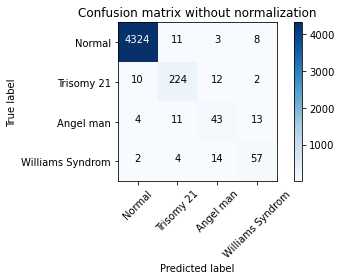

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

cnf_matrix = confusion_matrix(y_test, rfc_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Normal','Trisomy 21','Angel man','Williams Syndrom'],
                      title='Confusion matrix without normalization')

In [31]:
target_names = ['Normal','Trisomy 21','Angel man','Williams Syndrom']
print(classification_report(y_test, rfc_predict, target_names=target_names))

                  precision    recall  f1-score   support

          Normal       1.00      0.99      1.00      4346
      Trisomy 21       0.90      0.90      0.90       248
       Angel man       0.60      0.61      0.60        71
Williams Syndrom       0.71      0.74      0.73        77

        accuracy                           0.98      4742
       macro avg       0.80      0.81      0.81      4742
    weighted avg       0.98      0.98      0.98      4742



In [32]:
import pickle

filename = 'C:/Users/HP/Desktop/Data/AllDiseases_RF_model.sav'
pickle.dump(rfc, open(filename, 'wb'))